<a href="https://colab.research.google.com/github/official-yahia/Titanic-Dataset/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Dataset

In [38]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/official-yahia/Titanic-Dataset/refs/heads/main/train.csv')

# View the first five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Inspection

In [39]:
# Check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
# Check summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# Check missing values
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Key Findings:

* **Age** has missing values.
* **Cabin** has too many missing values → can drop it.
* **Sex** and **Pclass** are categorical and important.





## Data Preprocessing and Cleaning

In [42]:
# Fill missing Age values with median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [43]:
# Drop Cabin column
data = data.drop(columns=['Cabin'])

In [44]:
# Fill missing Embarked values with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

## Exploratory Data Analysis

#### [1] Survival by Gender

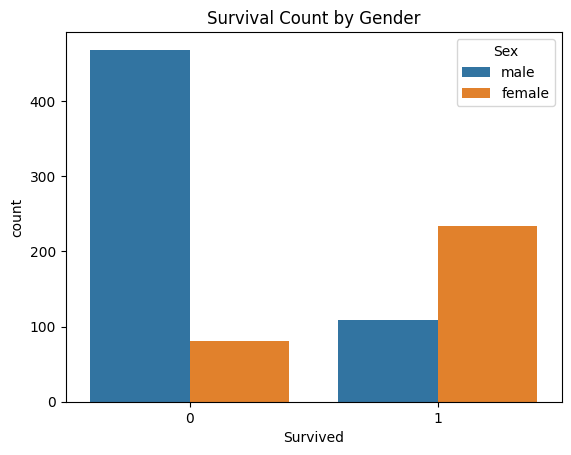

In [45]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Gender')
plt.show()

**Observation:** Women survived at a higher rate than men.

#### [2] Survival by Passenger Class

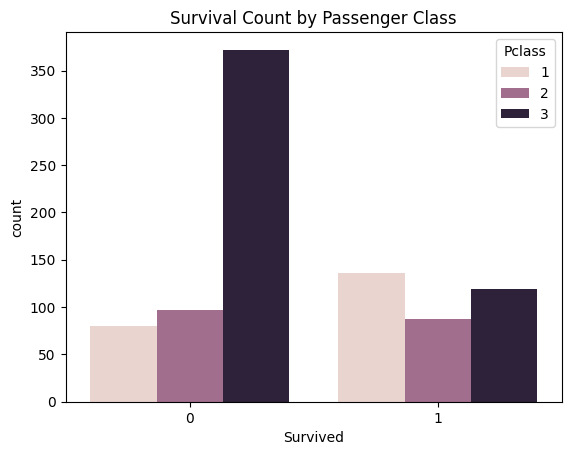

In [46]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

**Observation:** First-class passengers had higher survival rates.

#### [3] Age Distribution of Survivors

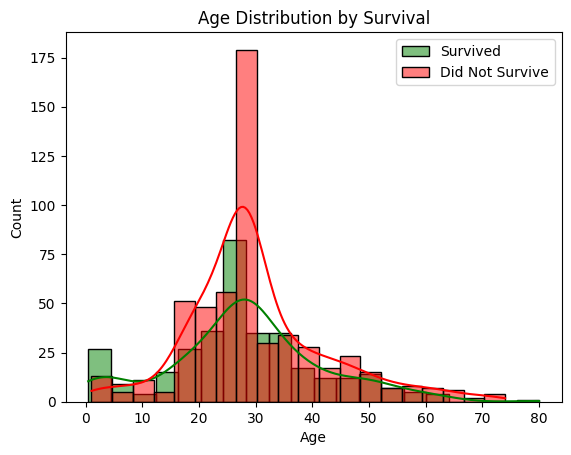

In [53]:
sns.histplot(data[data['Survived']==1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(data[data['Survived']==0]['Age'], bins=20, kde=True, color='red', label='Did Not Survive')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

**Observation:** Younger passengers had slightly higher survival rates.